## ✅ Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import tensorflow as tf  # TensorFlow kütüphanesini içe aktarıyoruz (derin öğrenme modelleri için)
import numpy as np  # NumPy: sayısal işlemler ve dizi manipülasyonu için kullanılır

# CIFAR-10 veri setini yüklüyoruz (10 farklı sınıfa ait 32x32 renkli görüntüler)
from tensorflow.keras.datasets import cifar10

# Etiketleri one-hot encoding formatına dönüştürmek için kullanılır
from tensorflow.keras.utils import to_categorical

# Katmanları sırayla ekleyebileceğimiz Sequential model sınıfı
from tensorflow.keras.models import Sequential

# Kullanacağımız sinir ağı katmanları:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
# Dense: tam bağlantılı katman
# Conv2D: konvolüsyonel katman (görüntüden özellik çıkarır)
# MaxPooling2D: boyut küçültme işlemi yapar (özellik haritası boyutunu azaltır)
# Flatten: çok boyutlu çıktıyı tek boyuta indirir
# Dropout: aşırı öğrenmeyi (overfitting) azaltmak için bazı nöronları rastgele devre dışı bırakır

# Modelin ağırlıklarını güncellemek için kullanılan optimizasyon algoritması
from tensorflow.keras.optimizers import RMSprop

# Görüntüleri eğitimde çeşitlendirmek için veri artırma (data augmentation) işlemi
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Modelin performansını değerlendirmek için sınıflandırma raporu
from sklearn.metrics import classification_report

# Grafik çizimi ve görselleştirme için matplotlib kütüphanesi
import matplotlib.pyplot as plt

# Uyarıları gizlemek için kullanılır (örneğin gereksiz "deprecated" uyarıları)
import warnings
warnings.filterwarnings("ignore")


## ✅ Veri Setinin Yüklenmesi ve Ön İşleme Adımları (Normalizasyon & One-Hot Encoding)

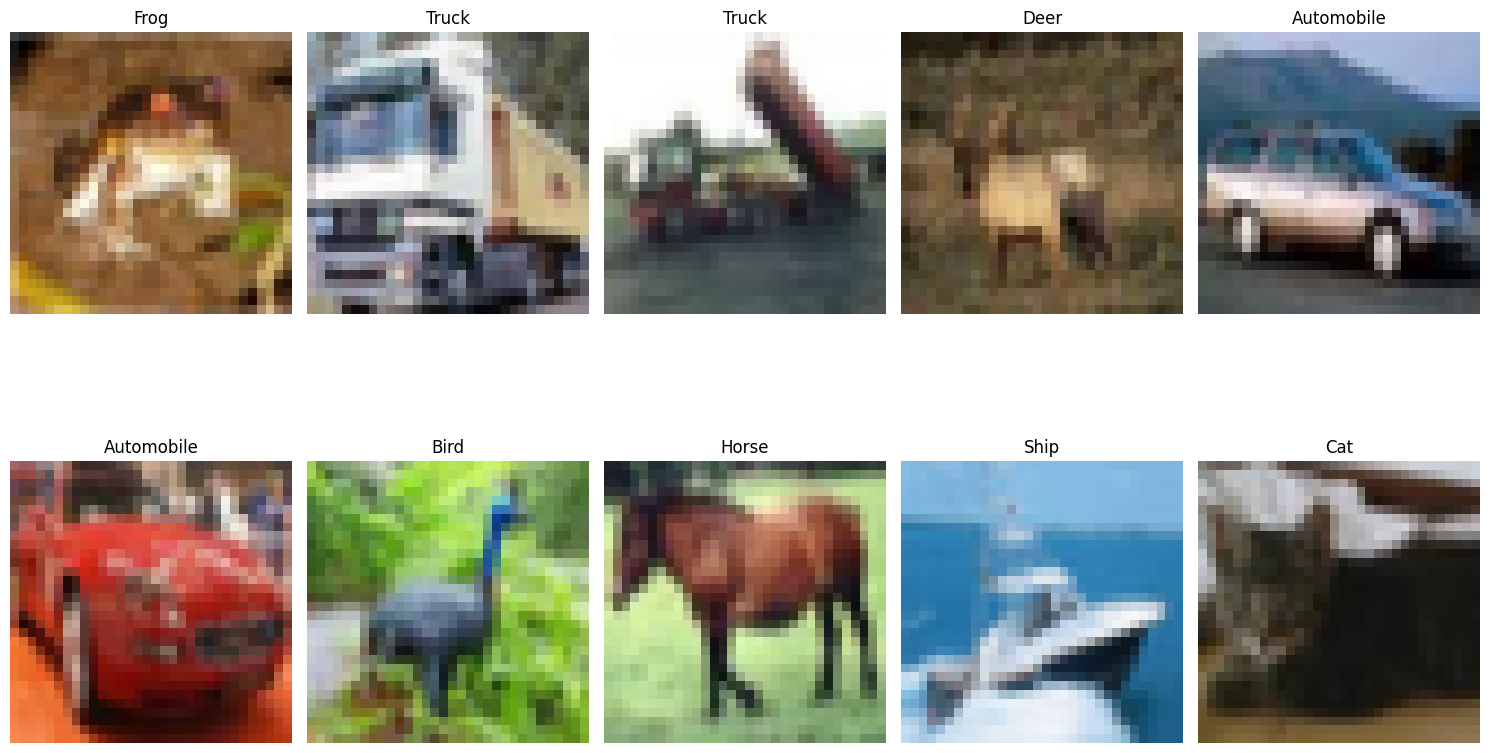

In [2]:
# CIFAR-10 veri setini yüklüyoruz (eğitim ve test verileri ayrı)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 veri setindeki sınıf etiketleri
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
                "Dog", "Frog", "Horse", "Ship", "Truck"]

# Eğitim verisinden bazı görüntüleri ve etiketlerini görselleştiriyoruz
fig, axs = plt.subplots(2, 5, figsize=(15, 10))  # 2 satır, 5 sütunluk bir görsel ızgara oluşturuyoruz

for i in range(5):
    # Üst satır: 0-4. görseller
    axs[0, i].imshow(x_train[i])  # Görseli çiz
    label = class_labels[int(y_train[i])]  # Etiketi al
    axs[0, i].set_title(label)  # Başlık olarak etiketi yaz
    axs[0, i].axis("off")  # Eksen çizgilerini kaldır

    # Alt satır: 5-9. görseller
    axs[1, i].imshow(x_train[i + 5])
    label = class_labels[int(y_train[i + 5])]
    axs[1, i].set_title(label)
    axs[1, i].axis("off")

plt.tight_layout()  # Alt alta binen başlıkları engellemek için
plt.show()

# Görüntü verilerini 0-1 aralığına normalleştiriyoruz (model daha iyi öğrenir)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Etiketleri one-hot encoding formatına dönüştürüyoruz (örneğin 3 -> [0,0,0,1,0,0,0,0,0,0])
y_train = to_categorical(y_train, 10)  # 10 sınıf olduğu için 10
y_test = to_categorical(y_test, 10)

## ✅ Veri Artırma (Data Augmentation) ile Modelin Genelleme Yeteneğini Geliştirme

In [3]:
# Görüntüleri yapay olarak artırmak (data augmentation) için ImageDataGenerator sınıfını kullanıyoruz
datagen = ImageDataGenerator(
    rotation_range=20,         # Görüntüyü rastgele -20 ile +20 derece arasında döndürür
    width_shift_range=0.2,     # Görüntüyü yatayda %20 oranında kaydırır
    height_shift_range=0.2,    # Görüntüyü dikeyde %20 oranında kaydırır
    shear_range=0.2,           # Görüntü üzerinde kesme (shear) işlemi uygular
    zoom_range=0.2,            # Görüntüye %20 oranında yakınlaştırma (zoom) uygular
    horizontal_flip=True,      # Görüntüyü yatayda rastgele çevirir (ayna yansıması gibi)
    fill_mode="nearest"        # Dönme/kayma sonrası oluşan boşlukları en yakın piksel değerleriyle doldurur
)

# Tanımladığımız veri artırma (data augmentation) işlemlerini eğitim verisine uygular
datagen.fit(x_train)

## ✅ Convolutional Neural Network (CNN) Modelinin Oluşturulması, Derlenmesi ve Eğitimi

In [4]:
# CNN modelimizi oluşturuyoruz
model = Sequential()

# --- Özellik çıkarımı katmanları ---
# İlk evre: Conv -> ReLU -> Conv -> ReLU -> MaxPool -> Dropout
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=x_train.shape[1:]))  # 32 filtre, 3x3 boyutunda, aynı boyutta çıkış
model.add(Conv2D(32, (3, 3), activation="relu"))  # İkinci konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))         # 2x2 boyutunda max pooling
model.add(Dropout(0.25))                          # Aşırı öğrenmeyi (overfitting) önlemek için %25 dropout

# İkinci evre: Conv -> ReLU -> Conv -> ReLU -> MaxPool -> Dropout
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))  # 64 filtreli konvolüsyon
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# --- Sınıflandırma katmanları ---
model.add(Flatten())                      # Çok boyutlu çıktıyı tek boyutlu vektöre dönüştürür
model.add(Dense(256, activation="relu"))  # Tam bağlantılı katman (dense layer), 256 nöronlu
model.add(Dropout(0.25))                  # Yine overfitting'e karşı dropout
model.add(Dense(10, activation="softmax"))  # Çıkış katmanı, 10 sınıf için softmax aktivasyonu

# Modelin özetini görüntülüyoruz
model.summary()

# --- Modeli derliyoruz ---
model.compile(
    optimizer=RMSprop(learning_rate=1e-4, decay=1e-6),  # RMSprop optimizer ve öğrenme oranı ayarı
    loss="categorical_crossentropy",                   # Çok sınıflı sınıflandırma için uygun kayıp fonksiyonu
    metrics=["accuracy"]                               # Modeli doğruluk metriğiyle değerlendireceğiz
)

# --- Modeli eğitiyoruz ---
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),  # Veri artırması uygulanmış eğitim verisi
                    epochs=10,                                      # Eğitim tekrar sayısı (epoch)
                    validation_data=(x_test, y_test)                # Doğrulama verisi
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,218 (2.51 MB)

 Trainable params: 658,218 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 170ms/step - accuracy: 0.1926 - loss: 2.1482 - val_accuracy: 0.3697 - val_loss: 1.7744
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 190ms/step - accuracy: 0.3221 - loss: 1.8502 - val_accuracy: 0.4218 - val_loss: 1.6424
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 167ms/step - accuracy: 0.3568 - loss: 1.7552 - val_accuracy: 0.4422 - val_loss: 1.5708
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.3803 - loss: 1.6868 - val_accuracy: 0.4243 - val_loss: 1.5662
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 170ms/step - accuracy: 0.4000 - loss: 1.6396 - val_accuracy: 0.4401 - val_loss: 1.5339
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 159ms/step - accuracy: 0.4152 - loss: 1.6038 - val_accuracy: 0.4741 - val_loss: 1.4535
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 170ms/step - accuracy: 0.4397 - loss: 1.5528 - val_accuracy: 0.5146 - val_loss: 1.3721
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 159ms/step - accuracy: 0.4492 -

## ✅ Modelin Test Verileri Üzerinden Tahmin Yapması ve Performans Raporu

In [5]:
# --- Modelin test verileri üzerinden tahmin yapıyoruz ---
# Test verileri üzerinde tahminler yapıyoruz
y_pred = model.predict(x_test)  # Modeli kullanarak test verisi üzerindeki tahminleri alıyoruz

# Tahmin sonuçlarını sınıf etiketlerine dönüştürüyoruz
y_pred_class = np.argmax(y_pred, axis=1)  # Tahmin sonuçlarını sınıf etiketine dönüştürme (max fonksiyonu ile)

# Gerçek etiketleri sınıf etiketlerine dönüştürüyoruz (one-hot encoding'den tekrar integer etiketlere)
y_true = np.argmax(y_test, axis=1)  # Gerçek etiketler için de aynı işlemi yapıyoruz

# --- Sınıflandırma raporu oluşturuyoruz ---
# Gerçek etiketler ve tahmin edilen etiketler arasındaki performans raporunu alıyoruz
report = classification_report(y_true, y_pred_class, target_names=class_labels)

# Sınıflandırma raporunu yazdırıyoruz
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
              precision    recall  f1-score   support

    Airplane       0.66      0.58      0.62      1000
  Automobile       0.60      0.69      0.64      1000
        Bird       0.65      0.17      0.27      1000
         Cat       0.53      0.19      0.28      1000
        Deer       0.54      0.34      0.42      1000
         Dog       0.50      0.46      0.48      1000
        Frog       0.47      0.79      0.59      1000
       Horse       0.47      0.71      0.56      1000
        Ship       0.74      0.57      0.65      1000
       Truck       0.43      0.80      0.56      1000

    accuracy                           0.53     10000
   macro avg       0.56      0.53      0.51     10000
weighted avg       0.56      0.53      0.51     10000



## ✅ Model Sonuçları: Eğitim ve Doğrulama Doğruluğu ile Kaybı Görselleştiriyoruz

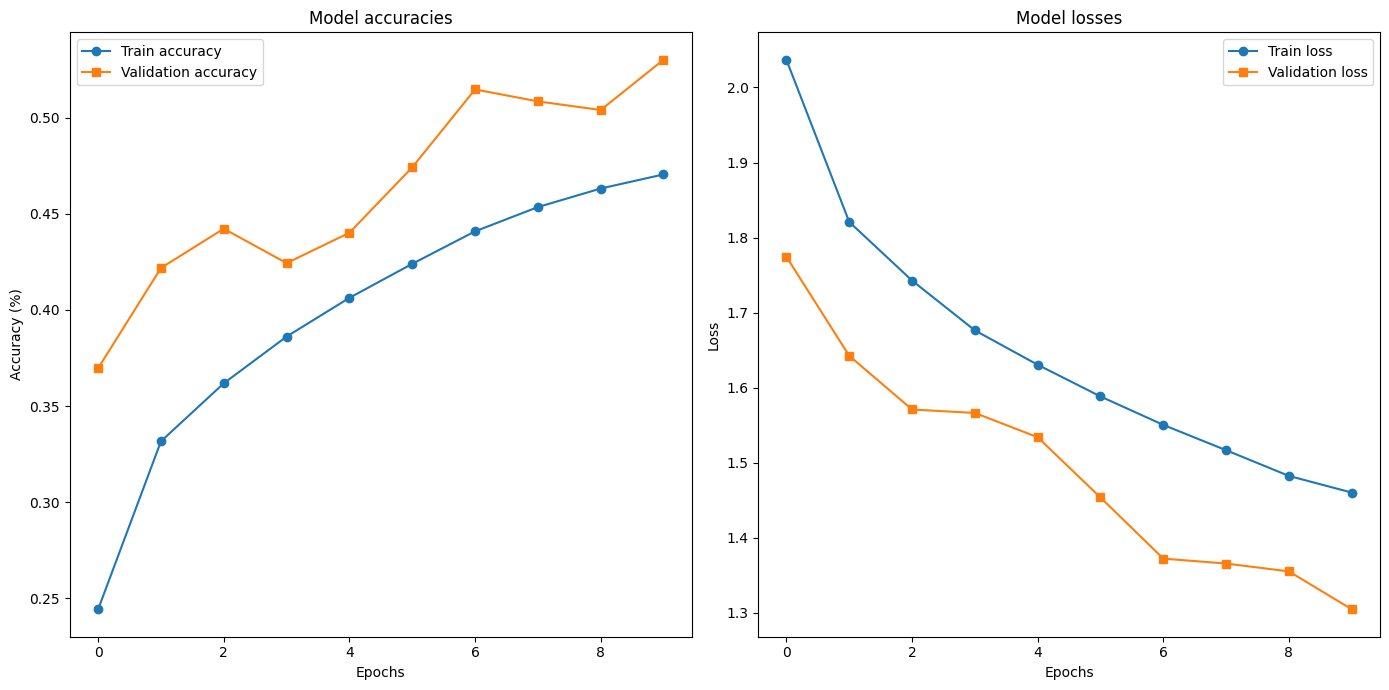

In [7]:
# --- Model Sonuçlarını Görselleştiriyoruz ---
history = history.history
# İki grafik için bir figür ve eksenler oluşturuyoruz
fig, ax = plt.subplots(1, 2, figsize=(14, 7))  # 1 satır, 2 sütunlu bir grafik düzeni

# Eğitim doğruluğunu (accuracy) çiziyoruz
ax[0].plot(history["accuracy"], "o-", label="Train accuracy")  # Eğitim doğruluğunu 'o' şeklinde, çizgili olarak çiziyoruz
ax[0].plot(history["val_accuracy"], "s-", label="Validation accuracy")  # Doğrulama doğruluğunu 's' şeklinde, çizgili olarak çiziyoruz
ax[0].set_xlabel("Epochs")  # X ekseni: epoch (eğitim dönemi sayısı)
ax[0].set_ylabel("Accuracy (%)")  # Y ekseni: doğruluk (accuracy) oranı
ax[0].set_title("Model accuracies")  # Grafik başlığı: Model doğrulukları
ax[0].legend()  # Grafik üzerindeki etiketleri gösteren açıklamalar (legend)

# Eğitim kaybını (loss) çiziyoruz
ax[1].plot(history["loss"], "o-", label="Train loss")  # Eğitim kaybını 'o' şeklinde, çizgili olarak çiziyoruz
ax[1].plot(history["val_loss"], "s-", label="Validation loss")  # Doğrulama kaybını 's' şeklinde, çizgili olarak çiziyoruz
ax[1].set_xlabel("Epochs")  # X ekseni: epoch
ax[1].set_ylabel("Loss")  # Y ekseni: kayıp (loss)
ax[1].set_title("Model losses")  # Grafik başlığı: Model kayıpları
ax[1].legend()  # Grafik üzerindeki etiketleri gösteren açıklamalar (legend)

# Grafiklerin arasındaki boşlukları optimize ediyoruz
plt.tight_layout()

# Grafikleri ekranda gösteriyoruz
plt.show()